# Аналитика сайта Яндекс.Афиша

Я стажёр в отделе маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет. В моём распоряжении три датасета - с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов. Мне предстоит изучить: как клиенты пользуются сервисом, когда делают первые покупки на сайте, сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются. На основе своего исследования я сделаю определённые выводы и рекомендации, которые помогут отделу маркетинга оптимизировать расходы на рекламу.

### План:

[Шаг 1. Изучение и подготовка данных к анализу](#1)       
[1.Изучение датасета с данными о визитах](#2)   
[2.Изучение датасета с данными о заказах](#3)   
[3.Изучение датасета с данными о расходах](#3.1)  

[Шаг 2. Рассчёт метрик и построение графиков](#4)    
[2.1. Продуктовые метрики](#5)    
[2.1.1 Рассчёт средних значений DAU, WAU и MAU за весь период](#6)    
[2.1.2 Количество сессий на одного пользователя в день](#7)  
[2.1.3 Продолжительность сессии](#8)  
[2.1.4 Рассчёт Retention Rate с примением когортного анализа](#9)  
[2.2. Метрики электронной коммерции](#10)  
[2.2.1 Расчёт среднего времени с момента первого посещения сайта до совершения покупки](#11)  
[2.2.2 Рассчёт среднего количества покупок на одного клиента](#12)  
[2.2.3 Рассчёт средней выручки с пользователя. График изменения этой метрики с течением времени](#13)  
[2.2.4 Изменение LTV во времени](#14)  
[2.3. Маркетинговые метрики](#15)  
[2.3.1 Подсчет общей суммы расходов на маркетинг. Распределение трат по источникам и график изменения этого распределения во времени](#16)  
[2.3.2. Рассчёт CAC. Определение стоимости привлечения покупателя из каждого источника трафика](#17)  
[2.3.3. Рассчёт ROMI по когортам в разрезе источников. Сравнение окупаемости за одинаковые периоды жизни когорт](#18)  

[Шаг 3. Выводы и рекомендации](#19)  
[3.1. Определение источников трафика и типа устройств, на которые маркетологам стоит делать упор](#20)  
[3.2. Выводы, сделанные после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции](#21)  
[3.3. Подведение итогов когортного анализа. Определение самых перспективных для компании когорт клиентов](#22)  
[3.4. Как различаются метрики в разрезе устройств](#23)  

<a name="1"></a>
## Шаг 1. Изучение и подготовка данных к анализу

In [1]:
#Импортирую необходимые мне в исследовании библиотеки:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Отключение предупреждений:
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

<a name="2"></a>
#### 1. Изучение датасета с данными о визитах

In [3]:
display(visits)
visits.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.duplicated().sum()

0

В таблице с данными о визитах 359400 строк и 5 столбцов, пропуски и дубликаты отсутствуют. Поменяем типы данных столбцов End_Ts и Start_Ts к типу datetime и приведем названия столбцов к нижнему регистру.

In [5]:
#Поменяем тип данных методом to_datetime:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [6]:
#Приведем к нижнему регистру названия столбцов таблицы visits:
visits.columns = visits.columns.str.lower()
#Переименую столбец source id в source_id, чтобы далее по нему объединять таблицы:
visits = visits.rename(columns = {'source id': 'source_id'})

<a name="3"></a>
#### 2. Изучение датасета с данными о заказах

In [7]:
display(orders)
orders.info()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders.duplicated().sum()

0

В таблице с данными о заказах 50415 строк и 3 столбца, пропуски и дубликаты отсутствуют. Поменяем тип данных столбца Buy Ts на datetime и приведем названия столбцов к нижнему регистру.

In [9]:
#Поменяем тип данных методом to_datetime:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [10]:
#Приведем к нижнему регистру названия столбцов таблицы orders:
orders.columns = orders.columns.str.lower()

<a name="3.1"></a>
#### Изучение датасета с данными о расходах

In [11]:
display(costs)
costs.info()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
costs.duplicated().sum()

0

В таблице с данными о расходах 2542 строк и 3 столбца, пропусков и дубликатов нет. Поменяем тип данных столбца dt на datetime.

In [13]:
#Поменяем тип данных методом to_datetime:
costs['dt'] = pd.to_datetime(costs['dt'])

#### Промежуточный вывод
Ознакомившись с данными таблицы с информацией о посещениях сайта, visits, обнаружила в ней 359400 строк и 5 столбцов, пропуски и дубликаты отсутствуют. Типы данных столбцов с датами начала и окончания сессии Start_Ts и End_Ts имеют тип object, не подходящий для работы с датой, поэтому привела данные этих столбцов к типу datetime. 
В таблице с данными о заказах, orders, 50415 строк и 3 столбца, пропуски и дубликаты отсутствуют. Тип данных столбца Buy Ts также имеет тип object, который я поменяла на datetime, чтобы далее работать с датой. 
Ознакомилась с таблицей, содержащей данные о расходах, costs, - в ней 2542 строк и 3 столбца, пропусков и дубликатов не обнаружила. Столбец dt с датой расхода имеет тип object, поменяла его на datetime. Все остальные столбцы таблиц имеют подходящий тип данных. 
Также привела к нижнему регистру названия столбцов таблиц visits и orders к нижнему регистру, чтобы в дальнейшем их можно было объединять с таблицей costs и между собой по одинаковым столбцам. 
Теперь наши данные готовы к анализу.

<a name="4"></a>
## Шаг 2. Рассчёт метрик и построение графиков

<a name="5"></a>
### 2.1. Продуктовые метрики

<a name="6"></a>
#### 2.1.1 Рассчёт средних значений DAU, WAU и MAU за весь период

In [14]:
#Создадим столбцы с годом, месяцем, неделей и датой посещения сайта:
visits['session_year']  = visits['start ts'].dt.year
visits['session_month'] = visits['start ts'].dt.month
visits['session_week']  = visits['start ts'].dt.week
visits['session_date'] = visits['start ts'].dt.date

#Рассчитаем средние значения DAU, WAU и MAU за весь период:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('средний DAU:', int(dau_total))
print('средний WAU:', int(wau_total))
print('средний MAU:', int(mau_total))

средний DAU: 907
средний WAU: 5716
средний MAU: 23228


#### График изменения MAU во времени

uid
session_year session_month       
2017         6              13259
             7              14183
             8              11631
             9              18975
             10             29692
             11             32797
             12             31557
2018         1              28716
             2              28749
             3              27473
             4              21008
             5              20701

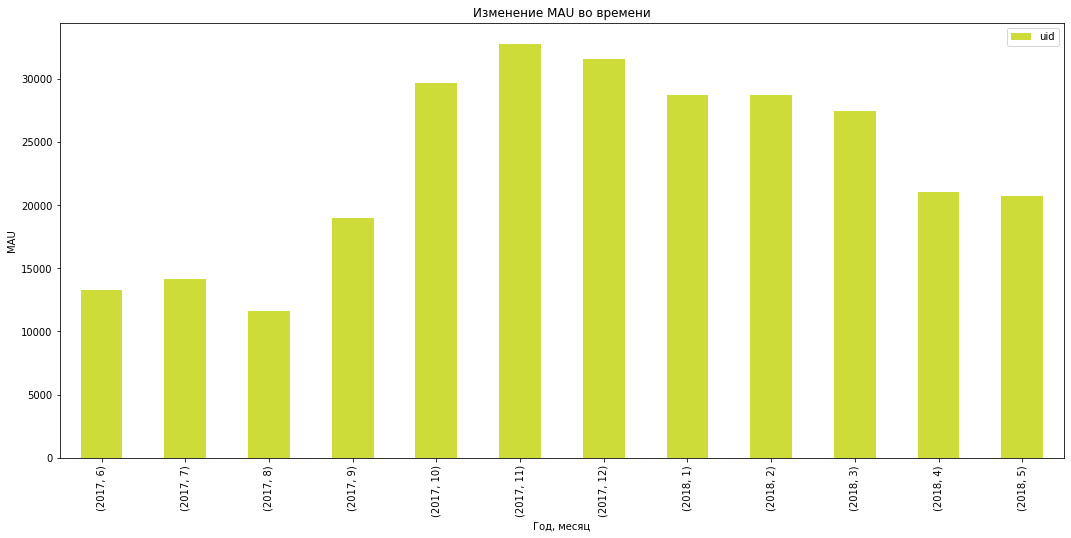

In [15]:
MAU = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
display(MAU)
MAU.plot.bar(figsize = (18,8), \
title = "Изменение MAU во времени", color = '#cddc39')                                         
plt.ylabel('MAU')
plt.xlabel('Год, месяц')
plt.show() 

По графику изменения MAU во времени видно, что после минимального значения этого показателя в августе, равного 11631 пользователей, метрика начинает расти, в сентябре она выросла до 29692, прибавив в росте 67.1%, в октябре рост по сравнению с предыдущим месяцем на 56.6%, и в ноябре метрика достигает своего максимального показателя в 32797 пользователей, что на 29% выше среднего MAU равного 23228, рост по  сравнению с октябрём - 10.5%. В декабре MAU слегка снижается - на 3.7%, в следующие месяца наблюдается небольшой спад, а к маю падает до 20701 пользователей. В целом, здесь можно наблюдать сезонное изменение MAU - просмотр фильмов актуален, в большинстве своём, в холодное время года.

#### График изменения WAU во времени

uid
session_year session_week      
2017         22            2021
             23            4129
             24            2812
             25            2878
             26            3064

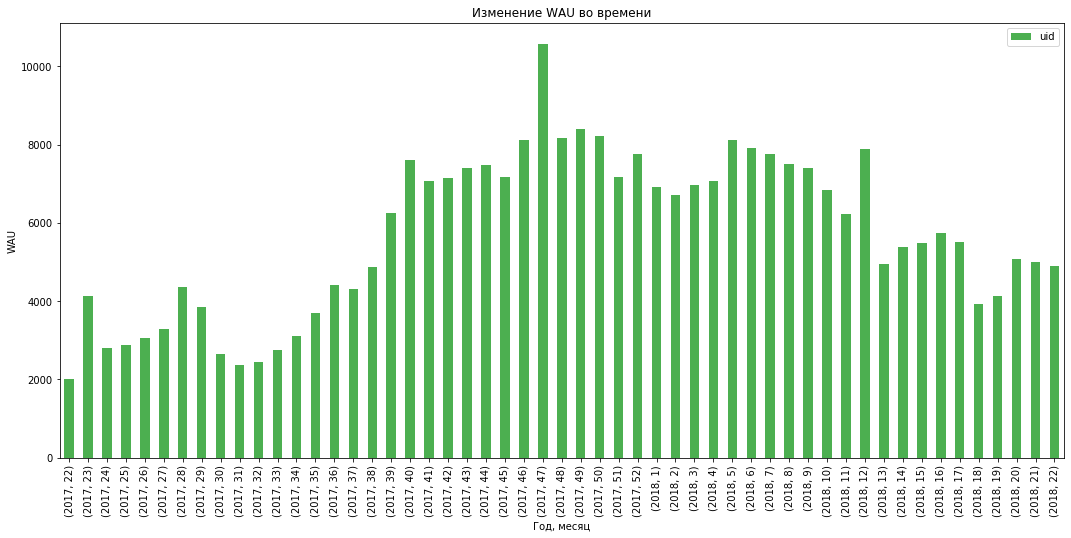

In [16]:
WAU = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
display(WAU.head())
WAU.plot.bar(figsize = (18,8), \
title = "Изменение WAU во времени", color = '#4caf50')                                         
plt.ylabel('WAU')
plt.xlabel('Год, месяц')
plt.show()

По графику изменения WAU во времени можно детальнее рассмотреть, что в ноябре именно на 47 неделе 2017 года произошёл скачок активной аудитории - на 30.5% по сравнению с предыдущей неделей, показатель достиг своего максимума за всё время - 10586 пользователей, что почти в 2 раза выше среднего WAU равного 5716 пользователей. Что может быть связано с выходом на этой неделе определенного фильма, которого многие ждали, либо прохождением какого-то мероприятия, куда пользователи хотели попасть. Также на данном графике хорошо видно увеличение WAU до 7898 пользователей на 12 неделе 2018 года, рост по сравнению с предыдущей неделей на 26.9%, вероятнее всего это опять связано с выходом долгожданной киноновинки. Самый низкий показатель зафиксирован на 22 неделе 2017 года, равный 2021 пользователь. На данном графике также хорошо прослеживается сезонность - летом WAU ниже, чем зимой.

#### График изменения DAU во времени

,uid
session_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820
...,...
2018-05-27,620
2018-05-28,1039
2018-05-29,948


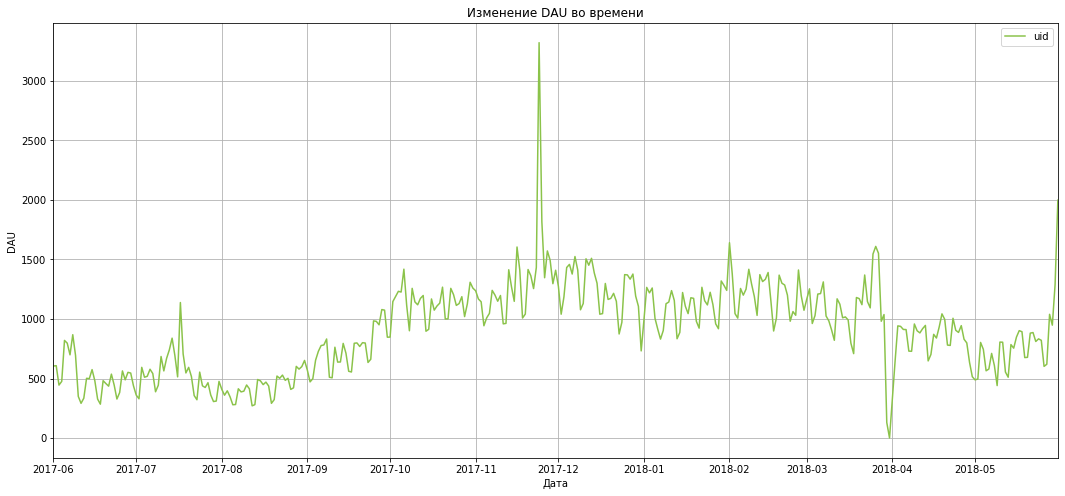

In [17]:
DAU = visits.groupby('session_date').agg({'uid': 'nunique'})
display(DAU)
DAU.plot(figsize = (18,8), grid = True, \
title = "Изменение DAU во времени", color = '#8bc34a')
plt.ylabel('DAU')
plt.xlabel('Дата')
plt.show()

По графику DAU мы также видим резкий скачок активной аудитории во второй половине ноября - показатель достигает отметки выше 3000 пользователей, это в 3 раза выше среднего значения DAU равного 907. А в конце марта, наоборот, этот показатель неожиданно упал до 0, возможно, это было связано с неполадками на сайте. К тому же на данном графике можно увидеть резкий рост DAU в начале июня - примерно до 2000 пользователей, видимо, это длилось 1-2 дня, поэтому данный факт было не видно по графикам MAU и DAU.

<a name="7"></a>
#### 2.1.2 Определение количества сессий на одного пользователя в день 

In [18]:
#Сгруппируем сессии по дням, и посчитаем число уникальных пользователей в день:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

#Среднее количество сессий на одного уникального пользователя в день:
sessions_per_user_mean = sessions_per_user.mean()
print(sessions_per_user_mean)

n_sessions           987.362637
n_users              907.991758
sessions_per_user      1.082170
dtype: float64


#### График изменения количества сессий на одного пользователя в день

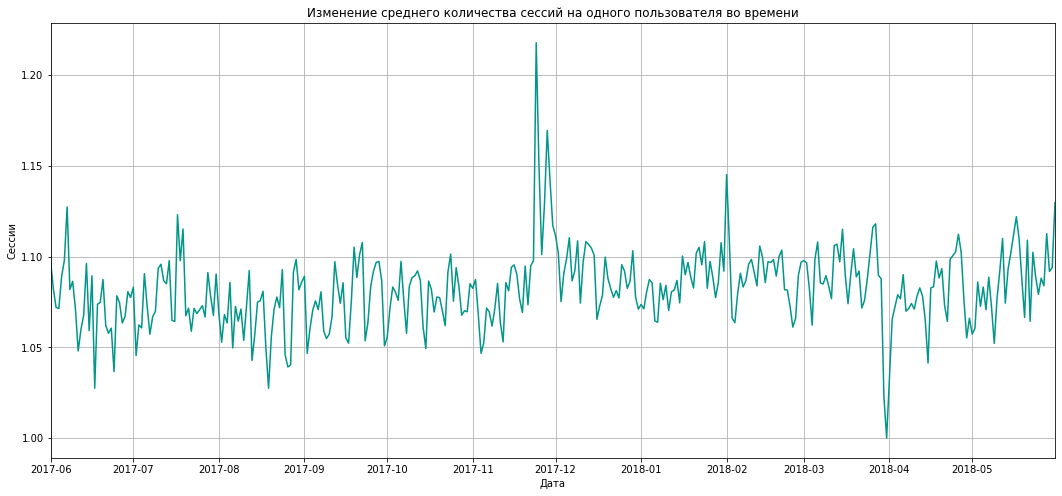

In [19]:
sessions_per_user['sessions_per_user'].plot(figsize = (18,8), title = \
"Изменение среднего количества сессий на одного пользователя во времени", grid = True, color = '#009688')
plt.ylabel('Сессии')
plt.xlabel('Дата')
plt.show()

Средний показатель количества сессий на одного пользователя в день равен 1. Во второй половине ноября данный показатель достиг максимального значения, также как и DAU, - 1.22 сессий на уникального пользователя, что на 13% выше среднего значения равного 1.08, а в конце марта минимального - 0, возможно по причине возникших проблем сайтом, как мы предположили выше. Также наблюдается скачок в феврале примерно до 1.14 сессий на уникального пользователя. Сильные спады данного показателя наблюдаются в июне и в августе, - в хорошую погоду просмотр фильмов неактуален.

<a name="8"></a>
#### 2.1.3 Продолжительность сессии

In [20]:
#Рассчитаем продолжительность сессии, отняв время окончания от времени начала сессии:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
#Средняя продолжительность одной сессии:
session_duration_mean = visits['session_duration_sec'].mean()
print('Средняя продолжительность одной сессии в секундах:',int(session_duration_mean))

Средняя продолжительность одной сессии в секундах: 643


#### График распределения продолжительности сессий по пользователям

In [21]:
#Посмотрим числовое описание данных столбца session_duration_sec:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Средняя продолжительность сессии равна 643.5 секунд или 10 минут 43 секунды, медианное время же равно 300 секунд или 5 минут, медиана больше похожа на правду. Построим диаграмму размаха, чтобы увидеть выбросы.

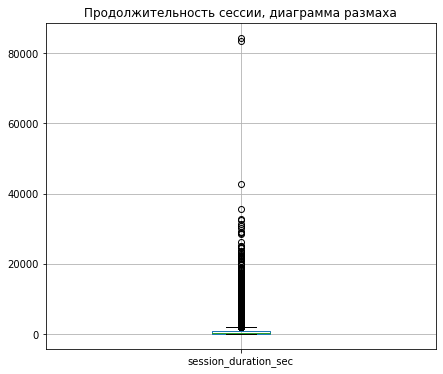

In [22]:
#Построим диаграмму размаха с помощью boxplot, чтобы увидеть выбросы в столбце session_duration_sec:
visits.boxplot('session_duration_sec', figsize =(7,6))
plt.title("Продолжительность сессии, диаграмма размаха")
plt.show()

На диаграмме размаха видны выбросы, которых очень много, что объясняет тот факт, что среднее значение выше медианного более чем в 2 раза. Отфильтруем выбросы.

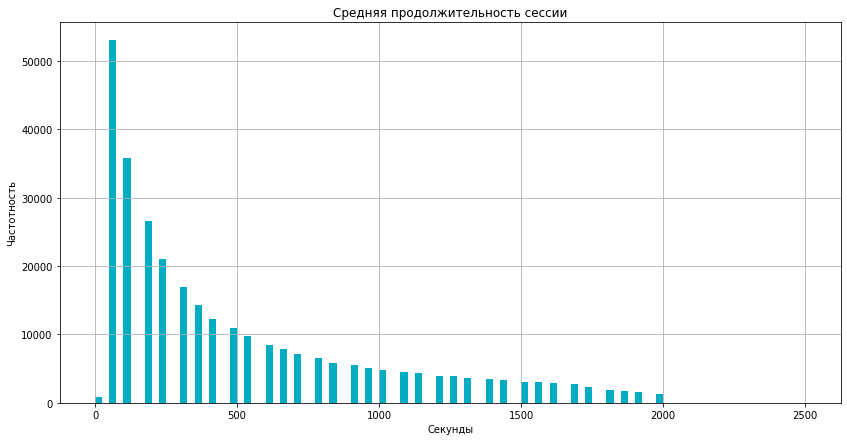

In [23]:
visits_filtered = visits.query('session_duration_sec < 2000 and session_duration_sec > 0')
visits_filtered['session_duration_sec'].hist(bins= 100, range = (0,2500), figsize = (14,7), grid = True,\
                                             color = '#00acc1') 
plt.ylabel('Частотность')
plt.xlabel('Секунды')
plt.title('Средняя продолжительность сессии')
plt.show()

In [24]:
visits_filtered['session_duration_sec'].describe()

count    300259.000000
mean        505.041154
std         486.416928
min          19.000000
25%         120.000000
50%         300.000000
75%         780.000000
max        1980.000000
Name: session_duration_sec, dtype: float64

После фильтрации выбросов, получили, что среднее время сессии 486 секунд, а медианное так и осталось 300 секунд, что ближе всего к истине. По построенной гистограмме можно сделать вывод, что самая частая длительность сессии - менее 100 секунд.

<a name="9"></a>
#### 2.1.4 Рассчёт Retention Rate с примением когортного анализа

In [25]:
#Возьмём дату, когда пользователь впервые зашел на сайт. Эти данные запишем в объект Series first_visit.
first_visit = visits.groupby('uid')['start ts'].min() 
first_visit.name = 'first_visit'
display(first_visit)
#Объединим его с исходным датафреймом visits:
visits = visits.join(first_visit, on='uid')

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_visit, Length: 228169, dtype: datetime64[ns]

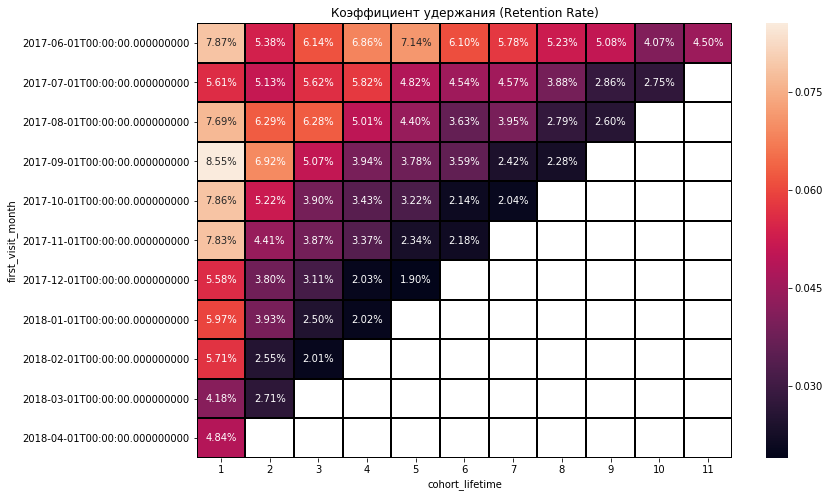

In [26]:
#Добавим столбцы с месяцем визита и месяцем первого визита в датафрейм visits:
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
#Посчитаем "месяц жизни" когорты: 
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].apply(np.round).astype('int') 

#Сгруппируем данные по когорте и lifetime.
#Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»: 
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц: 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

#Переименуем столбец user_id в cohort_users методом rename():
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on ='first_visit_month') 

#Рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в
#когорте:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts = cohorts.loc[cohorts.loc[:,'cohort_lifetime'] > 0]
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',
                                      aggfunc='sum') 

#Построим сводную таблицу и создадим тепловую карту:
plt.figure(figsize=(12, 8))
plt.title("Коэффициент удержания (Retention Rate)")
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='black') 

Распределив пользователей по когортам относительно месяца их первой покупки, рассчитали Retention Rate. В итоге, на шестой месяц жизни когорты самый высокий показатель Retention Rate у когорты пользователей, пришедших в июне - 6.1%, а самый низкий у когорты октября, - 2.14%. При том, явно наблюдается такая тенденция, что каждая последующая когорта имеет показатель удержания ниже, чем у предыдущей когорты. Например, у когорты пользователей, пришедших в июле коэффициент удержания ниже на 25.6%, чем у пользователей, пришедших в июне.
Это говорит, что с каждой новой когортой поведение пользователей меняется. Возможно, были выбраны неэффективные источники трафика.

#### Проанализировав продуктовые метрики, я пришла к следующим выводам:
1. В ноябре MAU достигает своего максимального показателя в 32797 пользователей, что на 29% выше среднего MAU равного 23228, рост по сравнению с октябрём - 10.5%, в следующие месяца наблюдается небольшой спад, а к маю падает до 20701 пользователей. В целом, здесь можно наблюдать сезонное изменение MAU - просмотр фильмов актуален, в большинстве своём, в холодное время года.
2. По графику изменения WAU заметила, что в ноябре именно на 47 неделе 2017 года произошёл скачок активной аудитории - на 30.5% по сравнению с предыдущей неделей, показатель достиг своего максимума за всё время - 10586 пользователей, что почти в 2 раза выше среднего WAU равного 5716 пользователей. Что может быть связано с выходом на этой неделе определенного фильма, которого многие ждали, либо прохождением какого-то мероприятия, куда пользователи хотели попасть. Также на данном графике хорошо видно увеличение WAU до 7898 пользователей на 12 неделе 2018 года, рост по сравнению с предыдущей неделей на 26.9%, вероятнее всего это опять связано с выходом долгожданной киноновинки. Самый низкий показатель зафиксирован на 22 неделе 2017 года, равный 2021 пользователь. На данном графике также хорошо прослеживается сезонность - летом WAU ниже, чем зимой.
3. По графику DAU мы также видим резкий скачок активной аудитории во второй половине ноября - показатель достигает отметки выше 3000 пользователей, это в 3 раза выше среднего значения DAU равного 907. А в конце марта, наоборот, этот показатель неожиданно упал до 0, возможно, это было связано с неполадками на сайте. К тому же на данном графике можно увидеть резкий рост DAU в начале июня - примерно до 2000 пользователей, видимо, это длилось 1-2 дня, поэтому данный факт было не видно по графикам MAU и DAU.
4. Средний показатель количества сессий на одного пользователя в день равен 1. Во второй половине ноября данный показатель достиг максимального значения, также как и DAU, - 1.22 сессий на уникального пользователя, что на 13% выше среднего значения равного 1.08, а в конце марта минимального - 0, возможно по причине возникших проблем сайтом, как мы предположили выше. Также наблюдается скачок в феврале примерно до 1.14 сессий на уникального пользователя. Сильные спады данного показателя наблюдаются в июне и в августе, - в хорошую погоду просмотр фильмов неактуален.
5. После фильтрации выбросов, получили, что среднее время сессии 486 секунд, а медианное так и осталось 300 секунд, что ближе всего к истине. По построенной гистограмме можно сделать вывод, что самая частая длительность сессии - менее 100 секунд.
6. На шестой месяц жизни когорты самый высокий показатель Retention Rate у когорты пользователей, пришедших в июне - 6.1%, а самый низкий у когорты октября, - 2.14%. При том, явно наблюдается такая тенденция, что каждая последующая когорта имеет показатель удержания ниже, чем у предыдущей когорты. Например, у когорты пользователей, пришедших в июле коэффициент удержания ниже на 25.6%, чем у пользователей, пришедших в июне. Это говорит, что с каждой новой когортой поведение пользователей меняется. Возможно, были выбраны неэффективные источники трафика.

<a name="10"></a>
### 2.2. Метрики электронной коммерции

<a name="11"></a>
#### 2.2.1 Расчёт среднего времени с момента первого посещения сайта до совершения покупки

In [27]:
# Найдем дату осуществления первой покупки и запишем ее для каждого пользователя в Series:
first_order = orders.groupby(['uid'])['buy ts'].min()
# Переименуем получившийся Series:
first_order.name = 'first_order'
#Создадим сводную таблицу, где индексами будут uid, а значениями первые визиты на сайт:
visits_new = visits.pivot_table(index = 'uid', values = 'first_visit', aggfunc = min)
#Объединим датафрейм visits_new c first_order по столбцу uid:
visits_new = visits_new.merge(first_order, on = 'uid')
#Создадим в таблице visits_new столбец buy_diff, результатом которого будет разность столбцов с первым заказом и с первым
#визитом на сайт:
visits_new['buy_diff'] = visits_new['first_order'] - visits_new['first_visit']
visits_new['buy_diff'] = visits_new['buy_diff']/np.timedelta64(1, 'm')
visits_new['buy_diff'] = visits_new['buy_diff'].round(1)
display(visits_new)

,first_visit,first_order,buy_diff
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,154022.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
...,...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,137973.0
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,7.0
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,333303.0


In [28]:
#Посмотрю на числовое описание данных столбца buy_diff:
visits_new['buy_diff'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: buy_diff, dtype: float64

Очень большая разница между средним значением и медианой, построю диаграмму размаха и посмотрю, есть ли выбросы:

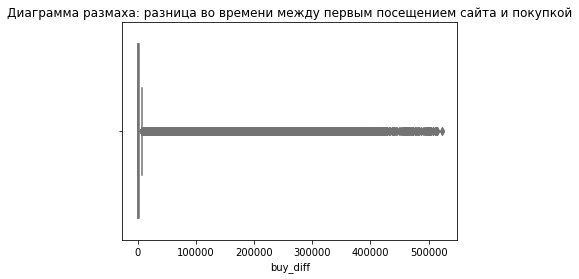

In [29]:
sns.boxplot(x="buy_diff", data=visits_new, palette='rainbow')
plt.title('Диаграмма размаха: разница во времени между первым посещением сайта и покупкой')
plt.show()

Явно есть выбросы в значениях, посмотрю поближе, с какого момента выбросы, сократив время до 60 минут.

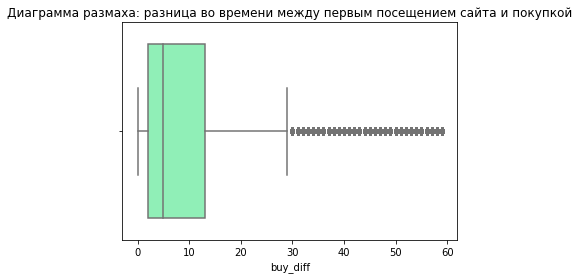

In [30]:
sns.boxplot(x="buy_diff", data=visits_new.query('buy_diff < 60'), palette='rainbow')
plt.title('Диаграмма размаха: разница во времени между первым посещением сайта и покупкой')
plt.show()

По диаграмме размаха таблицы visits_new по отсортированному столбцу buy_diff видно, что свыше 30 минут уже начинаются выбросы. Отсортируем значения ниже 30 минут и построим график:

count    20814.000000
mean         6.937446
std          6.956380
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         29.000000
Name: buy_diff, dtype: float64

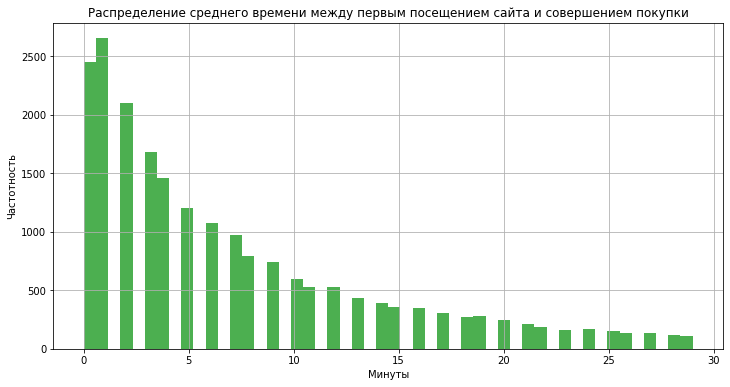

In [31]:
visits_new_sorted = visits_new.query('buy_diff < 30')
visits_new_sorted.hist(bins=50, color= '#4caf50', figsize = (12,6))
plt.title('Распределение среднего времени между первым посещением сайта и совершением покупки')
plt.ylabel('Частотность')
plt.xlabel('Минуты')
visits_new_sorted['buy_diff'].describe()

После сортировки выбросов среднее время между первым посещением сайта и покупкой стало равно 7 минутам, медианное время - 5 минут. На графике видно, что большая часть приходится на первые 5 минут, а точнее 0-2 минуты, потом уже идет спад. На основе чего можно сделать вывод, что пользователи заходят на сайт за чем-то конкретным, сразу совершают покупку и уходят с него. 

<a name="12"></a>
#### 2.2.2 Рассчёт среднего количества покупок на одного клиента 

Применяя когортный анализ, рассчитаю среднее количество покупок на одного клиента за период 6 месяцев. 

In [32]:
#Методом join() объединим датафрейм orders и Series first_order по столбцу 'uid':
order_frequency = pd.merge(orders, first_order, on = 'uid')
print(order_frequency.head(10)) 

               buy ts  revenue                   uid         first_order
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00
7 2017-06-05 14:30:00     7.33  12464626743129688638 2017-06-01 08:54:00
8 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00
9 2017-06-02 12:44:00     0.85   3644482766749211722 2017-06-01 09:22:00


In [33]:
#Создам функцию для рассчёта разницы во времени между покупкой и первой покупкой:
def diff_month(row):
    date1 = row['buy ts']
    date2 = row['first_order']
    return(date1.year - date2.year) * 12 + date1.month - date2.month
order_frequency['time_diff'] = order_frequency.apply(diff_month, axis =1)
order_frequency['first_order'] = order_frequency['first_order'].astype('datetime64[M]')
display(order_frequency)

,buy ts,revenue,uid,first_order,time_diff
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,0


In [34]:
purchases_grouped_by_cohorts = order_frequency.groupby(['first_order', 'time_diff']).agg({'buy ts': 'count',\
                                                                                          'uid': 'nunique'}) 
purchases_grouped_by_cohorts['purchases_per_user'] = purchases_grouped_by_cohorts['buy ts'] /\
purchases_grouped_by_cohorts['uid']
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()
display(purchases_grouped_by_cohorts)
#Когорты по первой сессии и по месяцам, сколько уникальных пользователей и сколько заказов они делали в среднем:

,first_order,time_diff,buy ts,uid,purchases_per_user
0,2017-06-01,0,2354,2023,1.163618
1,2017-06-01,1,177,61,2.901639
2,2017-06-01,2,174,50,3.480000
3,2017-06-01,3,226,54,4.185185
4,2017-06-01,4,292,88,3.318182
...,...,...,...,...,...
74,2018-03-01,2,176,58,3.034483
75,2018-04-01,0,2495,2276,1.096221
76,2018-04-01,1,195,69,2.826087
77,2018-05-01,0,3249,2988,1.087349


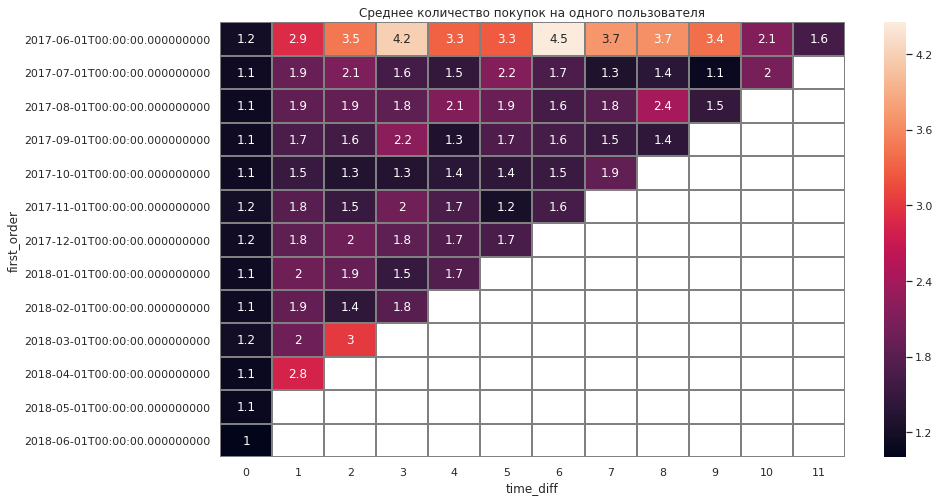

In [35]:
#Создам сводную таблицу, где строками будут когорты, колонками "месяцы жизни" когорт, а значениями среднее количество покупок 
#на одного пользователя:
purchase_pivot = purchases_grouped_by_cohorts.pivot_table(index = 'first_order',
                                                          columns = 'time_diff', values = 'purchases_per_user')
#Построю тепловую карту по сводной таблице:
sns.set(style = 'white')
plt.figure(figsize = (14,8))
plt.title('Среднее количество покупок на одного пользователя')
sns.heatmap(purchase_pivot, annot = True, linewidths = 1, linecolor = 'gray')
plt.show()

In [36]:
#Найдем общее число покупок:
total_orders = orders['buy ts'].count()
#Найдем общее число уникальных пользователей:
total_purchasers = orders['uid'].nunique()
#Посчитаем среднее число покупок на одного уникального пользователя:
purchases_per_user = total_orders / total_purchasers
print('Среднее количество покупок на одного пользователя:',purchases_per_user.round(2))

Среднее количество покупок на одного пользователя: 1.38


In [37]:
len(orders['uid'].unique())

36523

Среднее число покупок на одного уникального пользователя равно 1.38.
Самое большое число покупок на одного пользователя у когорты июня 2017 года, при том, эта когорта опережает другие по данному показателю в каждый "месяц своей жизни". На тетьем "месяце жизни" июньской когорты количество покупок на пользователя - 4.2, а на шестом "месяце жизни" оно достигает максимума - 4.5, в то время как у июльской на этом же "месяце жизни" всего 1.7 - на 62% меньше. На одиннадцатом месяце число покупок июньской когорты падает до 1.6.
Хорошо себя показывают майская и июньская когорты 2018 года, с 2 и 2.8 покупок на пользователя на первом месяце существования. У майской когорты в среднем 3 покупки на пользователя на втором "месяце жизни" - это хорошая тенденция, по данному показателю они догоняют когорту июня 2017 года.

<a name="13"></a>
#### 2.2.3 Рассчёт средней выручки с пользователя. График изменения этой метрики с течением времени

In [38]:
#Выделим месяц из столбца buy ts таблицы orders:
orders['buy ts'] = orders['buy ts'].astype('datetime64[M]')
#Посчитаю общую выручку методом sum():
total_revenue = orders['revenue'].sum()
#Посчитаю количество уникальных пользователей методом nunique():
unique_users = orders['uid'].nunique()
#Разделив общую выручку на количество пользователей, получу выручку на одного пользователя:
revenue_per_user = total_revenue / unique_users
print('Размер выручки с одного уникального пользователя:', revenue_per_user.round(2))

Размер выручки с одного уникального пользователя: 6.9


In [39]:
#Построю таблицу, где сгруппирую время покупки по месяцам и выведу сумму выручки и количество уникальных покупателей по месяцам:
orders_2 = orders.groupby('buy ts').agg({'revenue': 'sum', 'uid': 'nunique'})
#Добавлю столбец revenue_per_user, который является результатом деления выручки за месяц на количество покупателей в этом месяце:
orders_2['revenue_per_user'] = orders_2['revenue'] / orders_2['uid']
display(orders_2)

,revenue,uid,revenue_per_user
buy ts,,,
2017-06-01,9557.49,2023,4.724414
2017-07-01,12539.47,1984,6.320297
2017-08-01,8758.78,1472,5.950258
2017-09-01,18345.51,2750,6.671095
2017-10-01,27987.70,4675,5.986674
2017-11-01,27069.93,4547,5.953360
2017-12-01,36388.60,4942,7.363132
2018-01-01,19417.13,3898,4.981306
2018-02-01,25560.54,4258,6.002945


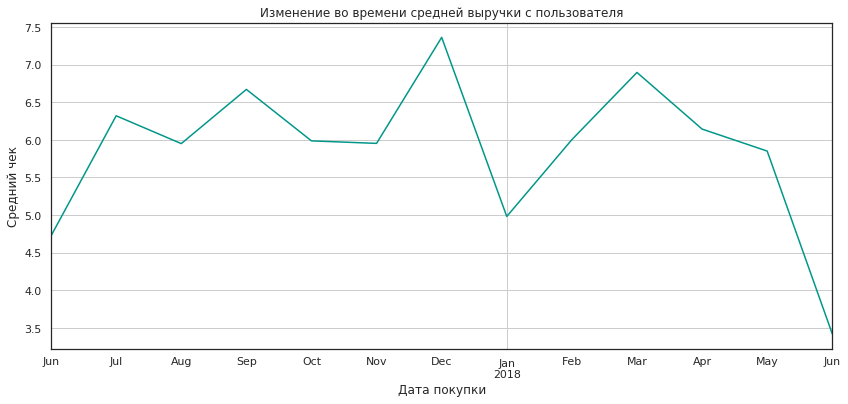

In [40]:
#Построю график, отображающий изменение распределения выручки от одного пользователя по месяцам:
orders_2['revenue_per_user'].plot(figsize = (14,6), color = '#009688', grid = True,\
                                  title = 'Изменение во времени средней выручки с пользователя')
plt.ylabel('Средний чек')
plt.xlabel('Дата покупки')
plt.show()

По линейному графику, отображающем изменение во времени средней выручки с пользователя, видим, что максимума этот показатель достиг в декабре - примерно 7.4 у.е. на уникального пользователя, на втором месте по этому показателю март - 6.8 у.е., - на 8.1% ниже, чем в декабре. Минимум пришел на июнь - 3.4 у.е., что на 58% ниже, чем в декабре. 

<a name="14"></a>
#### 2.2.4 Изменение LTV во времени

Выясним, как меняется во времени накопительный LTV по когортам. Сравним средний LTV по когортам за 6 месяцев, будем оценивать когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

In [41]:
#Выделим месяцы из дат в таблицах с расходами и заказами:
costs['month'] = costs['dt'].astype('datetime64[M]') 
orders['order_month'] = orders['buy ts'].astype('datetime64[M]') 

In [42]:
#Получим месяц первой покупки каждого покупателя:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders) 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [43]:
#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes) 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [44]:
#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = pd.merge(orders,first_orders, on='uid')
display(orders_new) 

,buy ts,revenue,uid,order_month,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-01,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-01,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-01,3.67,3993697860786194247,2018-05-01,2018-05-01


In [45]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом
#reset_index():
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts) 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [46]:
#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
display(report)

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [47]:
#Нужно найти валовую прибыль, умножив выручку на маржинальность.
#LTV — относительный показатель. Его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст
#когорты.
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report.head()) 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [48]:
#Отфильтруем таблицу с помощью индексации, нам нужны когорты, "прожившие" не менее 6 месяцев:
report_sorted = report.loc[report.loc[:,'age'] < 7]
report_sorted_2 = report_sorted.loc[report_sorted.loc[:,'first_order_month'] < '2017-12-01']
display(report_sorted_2.head(10))

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
5,2017-06-01,2023,2017-11-01,1487.92,1487.92,5
6,2017-06-01,2023,2017-12-01,1922.74,1922.74,6
12,2017-07-01,1923,2017-07-01,11557.65,11557.65,0
13,2017-07-01,1923,2017-08-01,644.61,644.61,1
14,2017-07-01,1923,2017-09-01,1199.05,1199.05,2


In [49]:
#Найдём LTV, разделив валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
report_sorted_2['ltv'] = report_sorted_2['gp'] / report_sorted_2['n_buyers']
#Для наглядности визуализируем когорты в виде сводной таблицы:    
output = report_sorted_2.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1)
    
output.fillna('') 

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244


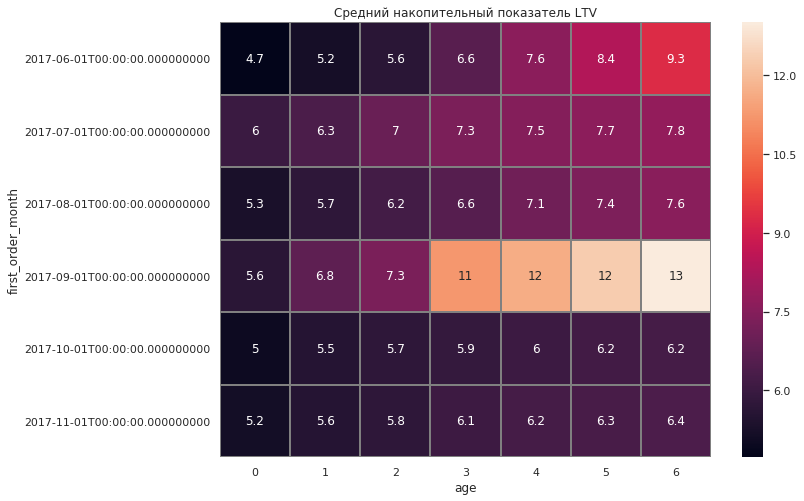

In [50]:
#Построю тепловую карту по сводной таблице:
sns.set(style = 'white')
plt.figure(figsize = (11,8))
plt.title('Средний накопительный показатель LTV')
sns.heatmap(output, annot = True, linewidths = 1, linecolor = 'gray')
plt.show()

На примере когорт, существующих не менее 6 месяцев, наблюдаем самый высокий накопительный показатель LTV у сентябрьской когорты, эта когорта каждый месяц приносит прибыль, - от 4.7 у.е. на человека в месяц первого посещения LTV вырос до 9.3 у.е. к 6 месяцу на 97.9%. 
А пользователь из сентябрьской когорты в среднем принес 13 у.е на шестом месяце её существования, - рост 132% по сравнению с показателем месяца первого посещения (5.6). Самый низкий LTV у когорты октября - 6.2 у.е. на пользователя, рост всего на 24% за 6 месяцев.

<a name="15"></a>
## 2.3. Маркетинговые метрики

Рассчитаю и отображу на графиках, как маркетинговые метрики отличаются по рекламным источникам


<a name="16"></a>
#### 2.3.1. Подсчет общей суммы расходов на маркетинг. Распределение трат по источникам и график изменения этого распределения во времени

Для начала посмотрим, сколько денег всего было потрачено, а так же какая была выручка. Для этого нарисуем круговую диаграмму.

In [51]:
costs_pie = costs.copy()

costs_pie['date'] = costs_pie['dt'].values.astype('datetime64[M]') 
costs_pie_grouped = costs_pie.groupby('dt').agg({'costs': 'sum'})

In [52]:
orders_grouped = orders.groupby('buy ts').agg({'revenue': 'sum'})

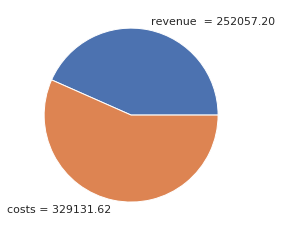

In [53]:
data = {'summary': [round(orders_grouped.sum().values[0], 2),round(costs_pie_grouped.sum().values[0], 2)]}
finish_pie = pd.DataFrame(data=data, index=['revenue', 'costs'])
fig1, ax1 = plt.subplots()
ax1.pie(finish_pie, labels=['revenue  = 252057.20', 'costs = 329131.62'])
plt.show()

Суммарная выручка - 252057 рублей. Суммарные затраты - 329131 рублей. Пока что затраты превышают выручку.

In [54]:
costs_by_source = (costs.groupby(['source_id', 'dt'])['costs'].sum().reset_index())
costs_by_source['dt'] = costs_by_source['dt'].astype('datetime64[M]')
costs_by_source_1 = costs_by_source.groupby(['source_id', 'dt'])['costs'].sum().reset_index()

In [55]:
def source_id_name (row):
    source_id = row['source_id']
    if source_id == 1:
        return 'source 1'
    if source_id == 2:
        return 'source 2'
    if source_id == 3:
        return 'source 3'
    if source_id == 4:
        return 'source 4'
    if source_id == 5:
        return 'source 5'
    if source_id == 6:
        return 'source 6'
    if source_id == 7:
        return 'source 7'
    if source_id == 8:
        return 'source 8'
    if source_id == 9:
        return 'source 9'
    if source_id == 10:
        return 'source 10'
    return 'неизвестно'
costs_by_source_1['source_id_name'] = costs_by_source_1.apply(source_id_name, axis=1)

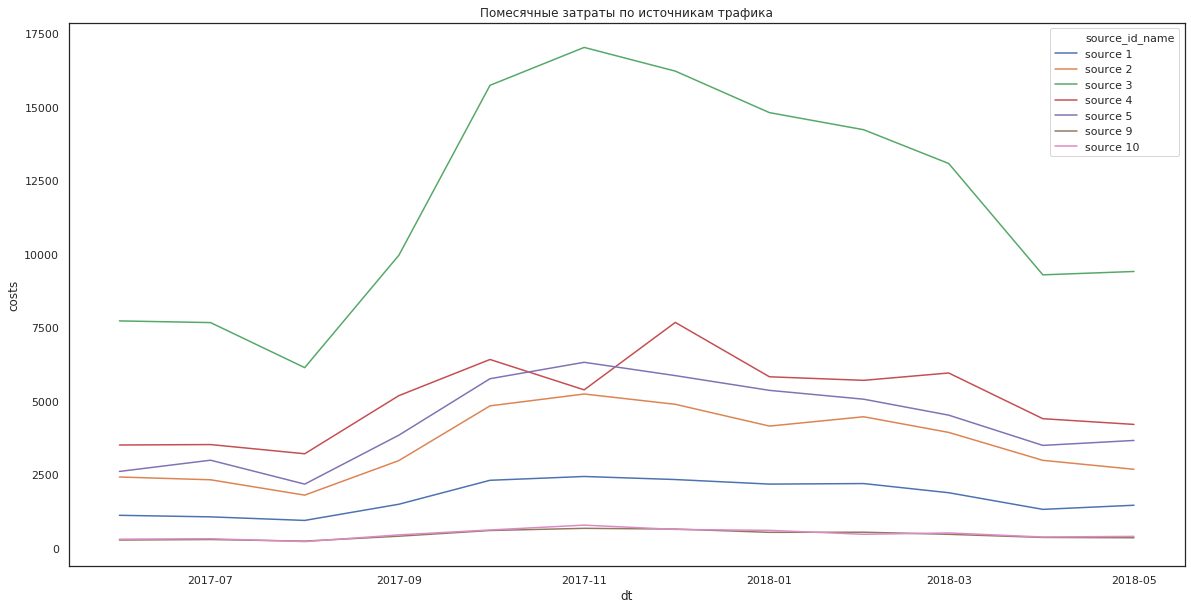

In [56]:
plt.figure(figsize=(20, 10))
(sns.lineplot(
    x='dt',
    y='costs',
    hue='source_id_name',
    data=costs_by_source_1,
    markers=True,
    dashes=False).set_title("Помесячные затраты по источникам трафика"))
plt.show()

In [57]:
costs_by_source_group = costs_by_source.groupby('source_id').sum()
(costs_by_source_group.style.bar(subset=['costs'], color='#B0E0E6', vmin=0, width=100)
 .set_caption("Количество пользователей, зашедших в сайт в месяц"))

,costs
source_id,
1,20833.3
2,42806
3,141322
4,61073.6
5,51757.1
9,5517.49
10,5822.49


С августа 2017 года маркетологи начали активные вливания в рекламу по большинству каналов, особенно по источнику 3, - на него за год потрачено 141322 рублей

В итоге, общая сумма расходов на маркетинг равна 329131.62 у.е.
По таблице распределения трат на маркетинг по источникам трафика видим, что самый дорогой источник трафика 3, - доля равна 42.9% от всех затрат на маркетинг. Интересно, что источник 3 и так самый дорогой, но начиная с августа затраты на него стали сильно расти, видимо, маркетологи сделали ставку на него. Далее идет источник 4 - 18.6% от всех затрат, в декабре затраты на него подросли, но к январю начали снова падать. А на третьем месте источник 5 с долей расходов равной 15.7%. Источники 9 и 10 на протяжении всего периода имеют маленькие доли - с среднем 1.7% и 1.8% соответственно, поэтому на графике они слились.

<a name="17"></a>
#### 2.3.2. Рассчёт CAC. Определение стоимости привлечения покупателя из каждого источника трафика

In [59]:
#Объединим таблицы с заказами и визитами:
orders_visits = orders.join(visits.sort_values(by='start ts').groupby('uid').agg({'source_id': 'first', 'device': \
                                                    'first', 'start ts': 'min'}), on='uid', how='inner')
display(orders_visits)

,buy ts,revenue,uid,order_month,source_id,device,start ts
0,2017-06-01,17.00,10329302124590727494,2017-06-01,1,desktop,2017-06-01 00:09:00
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2,desktop,2017-06-01 00:14:00
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2,desktop,2017-06-01 00:25:00
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2,desktop,2017-06-01 00:14:00
4,2017-06-01,0.37,14200605875248379450,2017-06-01,3,desktop,2017-06-01 07:31:00
...,...,...,...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01,4,touch,2018-05-31 09:11:00
50411,2018-05-01,5.80,11369640365507475976,2018-05-01,10,desktop,2018-05-31 23:05:00
50412,2018-05-01,0.30,1786462140797698849,2018-05-01,3,desktop,2018-05-31 23:52:00
50413,2018-05-01,3.67,3993697860786194247,2018-05-01,3,desktop,2017-10-23 12:32:00


In [60]:
#Сгруппирую полученную таблицу по источникам трафика, и подсчитаю количество покупателей, пришедших из каждого источника:
visits_grouped = orders_visits.groupby('source_id').agg({'uid':'nunique'})
display(visits_grouped)

,uid
source_id,
1,2899
2,3506
3,10473
4,10296
5,6931
7,1
9,1088
10,1329


In [61]:
#Сгруппирую таблицу с расходами по источникам трафика, подсчитаю количество расходов по каждому источнику:
costs_grouped = costs.groupby('source_id').agg({'costs': 'sum'})
display(costs_grouped)

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [62]:
#Объединю сгруппированную таблицу с расходами и с группированную таблицу с количеством покупателей по столбцу source_id:
visits_costs = pd.merge(costs_grouped, visits_grouped, on = 'source_id')
#Посчитаю среднее число расходов на одного покупателя, разделив столбец costs на столбец uid:
visits_costs['cac'] = visits_costs['costs'] / visits_costs['uid']
display(visits_costs)

,costs,uid,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


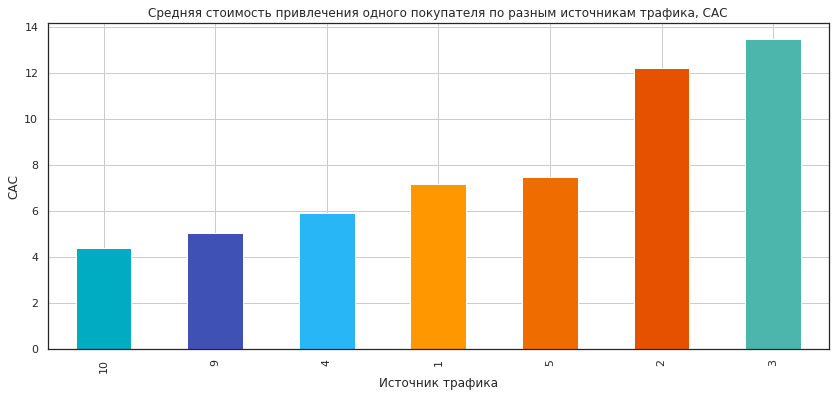

In [63]:
#Построю баровый график, визуализирующий среднее число расходов на покупателя по каждому источнику:
visits_costs['cac'].sort_values().plot.bar(figsize =(14,6), grid = True, color = ['#00acc1', '#3f51b5', '#29b6f6', \
'#ff9800','#ef6c00','#e65100','#4db6ac'], title = 'Средняя стоимость привлечения одного покупателя по разным источникам трафика, \
CAC')
plt.ylabel('CAC')
plt.xlabel('Источник трафика')
plt.show()

In [64]:
print('Средняя стоимость привлечения одного покупателя:', visits_costs['cac'].mean().round(2))

Средняя стоимость привлечения одного покупателя: 7.96


Средняя стоимость привлечения одного покупателя равна приблизительно 7.96 у.е. Дороже всего обходится привлечение покупателя из источника 3 - 13.49 у.е., чуть дешевле из источника 2 - 12.2 у.е., привлечение покупателя из источника 5 в среднем обходится в 7.47 у.е. Самый дешевый источник трафика 10 - стоимость привлечения клиента 4.38 у.е., это в 3 раза дешевле, чем у источника 3.

<a name="18"></a>
#### 2.3.3. Рассчёт ROMI по когортам в разрезе источников. Сравнение окупаемости за одинаковые периоды жизни когорт

Чтобы найти ROMI по когортам в разрезе источников, найдём LTV в разрезе источников:

In [65]:
#Объединим таблицы с заказами и визитами:
orders_visits = orders.join(visits.sort_values(by='start ts').groupby('uid').agg({'source_id': 'first', 'device': \
                                                    'first', 'start ts': 'min'}), on='uid', how='inner')
display(orders_visits)

,buy ts,revenue,uid,order_month,source_id,device,start ts
0,2017-06-01,17.00,10329302124590727494,2017-06-01,1,desktop,2017-06-01 00:09:00
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2,desktop,2017-06-01 00:14:00
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2,desktop,2017-06-01 00:25:00
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2,desktop,2017-06-01 00:14:00
4,2017-06-01,0.37,14200605875248379450,2017-06-01,3,desktop,2017-06-01 07:31:00
...,...,...,...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01,4,touch,2018-05-31 09:11:00
50411,2018-05-01,5.80,11369640365507475976,2018-05-01,10,desktop,2018-05-31 23:05:00
50412,2018-05-01,0.30,1786462140797698849,2018-05-01,3,desktop,2018-05-31 23:52:00
50413,2018-05-01,3.67,3993697860786194247,2018-05-01,3,desktop,2017-10-23 12:32:00


In [66]:
#Сгруппирую полученную таблицу по источникам трафика, и подсчитаю выручку по каждому:
ord_vis_grouped = orders_visits.groupby('source_id').agg({'revenue':'sum'})
display(ord_vis_grouped)

,revenue
source_id,
1,31090.55
2,46923.61
3,54511.24
4,56696.83
5,52624.02
7,1.22
9,5759.40
10,4450.33


In [67]:
#Объединю сгруппированную таблицу с расходами и сгруппированную таблицу с выручкой по по столбцу с источниками трафика:
romi_1 = pd.merge(costs_grouped, ord_vis_grouped, on = 'source_id')
#Посчитаю среднее число расходов на одного покупателя, разделив столбец costs на столбец uid:
romi_1['romi'] = romi_1['revenue'] / romi_1['costs']
display(romi_1)

,costs,revenue,romi
source_id,,,
1,20833.27,31090.55,1.492351
2,42806.04,46923.61,1.096191
3,141321.63,54511.24,0.385725
4,61073.60,56696.83,0.928336
5,51757.10,52624.02,1.016750
9,5517.49,5759.40,1.043844
10,5822.49,4450.33,0.764335


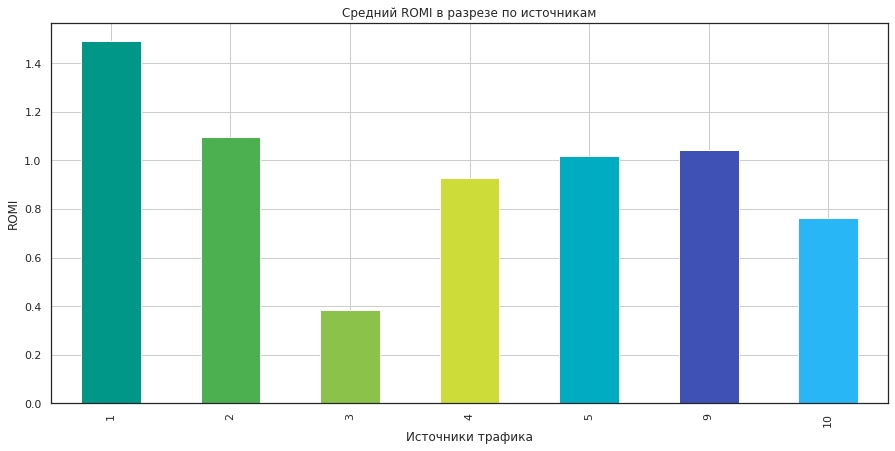

In [68]:
#Построим баровый график, на котором изображён средний ROMI в разрезе по источникам:
romi_1['romi'].plot.bar(color = ['#009688', '#4caf50', '#8bc34a', '#cddc39', '#00acc1', '#3f51b5', \
                        '#29b6f6'], grid = True, title = 'Средний ROMI в разрезе по источникам',figsize = (15, 7))
plt.ylabel('ROMI')
plt.xlabel('Источники трафика')
plt.show()

Рассчитав ROMI в разрезе источников трафика я пришла к выводу, что окупился и принёс прибыль только источник трафика 1 - его ROMI равен 1.49.
Источники 2, 9 и 5 только окупились - их ROMI близок к 1, - это означает, что доходов данные источники не принесли. Ниже всего ROMI у источника 3, равен 0.38, что почти в 4 раза ниже, чем ROMI источника 1.

#### Промежуточный вывод
Рассчитав маркетинговые метрики, я пришла к следующим выводам:
1. В итоге, общая сумма расходов на маркетинг равна 329131.62 у.е. Самый дорогой источник трафика 3, - доля расходов равна 42.9% от всех затрат на маркетинг. Интересно, что источник 3 и так самый дорогой, но начиная с августа затраты на него стали сильно расти, видимо, маркетологи сделали ставку на него. Далее идет источник 4 - 18.6% от всех затрат, в декабре затраты на него подросли, но к январю начали снова падать. А на третьем месте источник 5 с долей расходов равной 15.7%. Источники 9 и 10 на протяжении всего периода имеют маленькие доли - с среднем 1.7% и 1.8% от общих расходов.
2. Средняя стоимость привлечения одного покупателя равна приблизительно 1.08 у.е. Дороже всего обходится привлечение одного покупателя из источника 3 - 1.89 у.е., чуть дешевле из источника 2 - 1.63 у.е., привлечение покупателя из источника 1 в среднем обходится в 1.1 у.е. Самый дешевый источник трафика 9 - стоимость привлечения клиента 0.6 у.е., это почти в 3 раза дешевле, чем у источника 3.
3. Учитывая во внимание ROMI когорт с "длиной жизни" не менее 6 месяцев, подытожила, что на шестой месяц своего существования окупились только два источника трафика - источник 4 с ROMI равным 1.96, - что является максимальным средним значением среди всех источников,- и источник 5 с ROMI равным 1.93. Самый низкий показатель ROMI у источника 10, равен 0.18, это почти в 11 раз ниже, чем ROMI источника 4.

<a name="19"></a>
## Шаг 3. Выводы и рекомендации

<a name="20"></a>
#### 3.1. Определение источников трафика и типа устройств, на которые маркетологам стоит делать упор

#### Изучу, с какого устройства нашим сервисом пользуются чаще

In [69]:
#Сгруппирую таблицу visits по типам устройств, подсчитаю количество посещений с каждого устройства:
visits_by_device = visits.groupby('device').agg({'uid': 'count'})
display(visits_by_device)

,uid
device,
desktop,262567
touch,96833


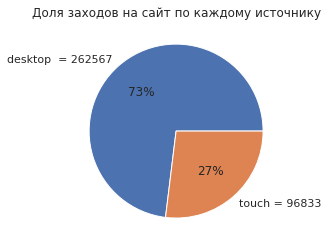

In [70]:
#Построю круговую диаграмму, отображающую доли посещений, распределённые по каждому типу устройства:
fig1, ax1 = plt.subplots()
ax1.pie(visits_by_device, labels= ['desktop  = 262567', 'touch = 96833'], autopct='%1.0f%%')
plt.title('Доля заходов на сайт по каждому источнику')
plt.show()

Чаще всего заходят на сайт с ПК, чем с телефона, - об этом нужно передать разработке, возможно, нужно что-то доработать в мобильной версии сайта, чтобы с него было удобнее пользоваться сервисом.

#### Найду средний чек на одного уникального пользователя в разрезе по типам устройств:

In [71]:
#Сгруппирую таблицу visits по уникальным пользователям, выведу столбец с временем первой сессии и столбец с типами девайсов:
visits_device = visits.groupby('uid').agg({'first_visit_month':'min', 'device': 'first'})
display(visits_device)

,first_visit_month,device
uid,,
11863502262781,2018-03-01,touch
49537067089222,2018-02-01,touch
297729379853735,2017-06-01,desktop
313578113262317,2017-09-01,desktop
325320750514679,2017-09-01,desktop
...,...,...
18446403737806311543,2017-11-01,desktop
18446424184725333426,2017-12-01,touch
18446556406699109058,2018-01-01,touch


In [72]:
#Объединю таблицы visits_device и orders по столбцу uid:
visits_device_orders = visits_device.merge(orders, on = 'uid', how = 'right')
display(visits_device_orders)

,uid,first_visit_month,device,buy ts,revenue,order_month
0,313578113262317,2017-09-01,desktop,2018-01-01,0.55,2018-01-01
1,1575281904278712,2017-06-01,touch,2017-06-01,1.22,2017-06-01
2,1575281904278712,2017-06-01,touch,2017-06-01,1.83,2017-06-01
3,2429014661409475,2017-10-01,desktop,2017-10-01,73.33,2017-10-01
4,2464366381792757,2018-01-01,desktop,2018-01-01,2.44,2018-01-01
...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-01,desktop,2017-09-01,0.24,2017-09-01
50411,18445407535914413204,2017-09-01,desktop,2017-09-01,0.12,2017-09-01
50412,18445601152732270159,2017-08-01,desktop,2018-03-01,4.22,2018-03-01
50413,18446156210226471712,2017-11-01,desktop,2018-02-01,9.78,2018-02-01


In [73]:
#Сгруппирую таблицу visits_device_orders по типам устройств, получу столбец с суммой выручки и количеством уникальных пользователей 
#по каждому типу:
df_grouped = visits_device_orders.groupby('device').agg({'revenue':'sum', 'uid':'nunique'})
df_grouped['revenue_per_user'] = df_grouped['revenue'] / df_grouped['uid']
display(df_grouped.round(2))

,revenue,uid,revenue_per_user
device,,,
desktop,211531.81,29222,7.24
touch,40525.39,7301,5.55


Средняя выручка с пользователя, зашедшего с ПК равна 7.24 у.е., а с пользователя, зашедшего с телефона или планшета, средняя выручка равна 5.55 у.е., что меньше на 23.3%. Возможно, что в мобильной версии сайта неудобно совершать покупки, тогда над ней стоит поработать, - маркетологам следует об этом поговорить с разработчиками.

#### Найду среднее время между первым посещением сайта и совершением покупки в разрезе по типам устройств:

In [74]:
#Сгруппирую таблицу visits по уникальным пользователям, выведу столбец с временем первой сессии и столбец с источником трафика:
visits_new_2 = visits.groupby('uid').agg({'first_visit':'min', 'device': 'first'})
display(visits_new_2)

,first_visit,device
uid,,
11863502262781,2018-03-01 17:27:00,touch
49537067089222,2018-02-06 15:55:00,touch
297729379853735,2017-06-07 18:47:00,desktop
313578113262317,2017-09-18 22:49:00,desktop
325320750514679,2017-09-30 14:29:00,desktop
...,...,...
18446403737806311543,2017-11-30 03:36:00,desktop
18446424184725333426,2017-12-06 20:32:00,touch
18446556406699109058,2018-01-01 16:29:00,touch


In [75]:
#Объединим датафрейм visits_new c first_order по столбцу uid:
visits_new_2 = visits_new_2.merge(first_order, on = 'uid')
display(visits_new_2)

,first_visit,device,first_order
uid,,,
313578113262317,2017-09-18 22:49:00,desktop,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,touch,2017-06-03 10:13:00
2429014661409475,2017-10-11 17:14:00,desktop,2017-10-11 18:33:00
2464366381792757,2018-01-27 20:10:00,desktop,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00,desktop,2017-11-24 10:14:00
...,...,...,...
18445147675727495770,2017-08-20 13:30:00,touch,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:48:00,desktop,2017-09-22 23:55:00
18445601152732270159,2017-08-07 11:51:00,desktop,2018-03-26 22:54:00


In [76]:
#Добавлю в таблицу visits_new_2 столбец buy_diff с разницей во времени между первым заказом и первым визитом на сайт:
visits_new_2['buy_diff'] = visits_new_2['first_order'] - visits_new_2['first_visit']
visits_new_2['buy_diff'] = visits_new_2['buy_diff']/np.timedelta64(1, 'm')
visits_new_2['buy_diff'] = visits_new_2['buy_diff'].round(1)
display(visits_new_2)

,first_visit,device,first_order,buy_diff
uid,,,,
313578113262317,2017-09-18 22:49:00,desktop,2018-01-03 21:51:00,154022.0
1575281904278712,2017-06-03 10:13:00,touch,2017-06-03 10:13:00,0.0
2429014661409475,2017-10-11 17:14:00,desktop,2017-10-11 18:33:00,79.0
2464366381792757,2018-01-27 20:10:00,desktop,2018-01-28 15:54:00,1184.0
2551852515556206,2017-11-24 10:14:00,desktop,2017-11-24 10:14:00,0.0
...,...,...,...,...
18445147675727495770,2017-08-20 13:30:00,touch,2017-11-24 09:03:00,137973.0
18445407535914413204,2017-09-22 23:48:00,desktop,2017-09-22 23:55:00,7.0
18445601152732270159,2017-08-07 11:51:00,desktop,2018-03-26 22:54:00,333303.0


In [77]:
#Группировка по типам устройств, подсчитаем среднюю разницу во времени по каждому устройству:
buy_diff_mean = visits_new_2.groupby('device').agg({'buy_diff':'mean'})
display(buy_diff_mean.round(2))

,buy_diff
device,
desktop,23529.52
touch,27584.80


Средняя разница во времени между первым посещением сайта и первой покупкой равна 23529.52 минут по типу устройства desktop и 27584.80 минут по типу touch. Но что-то в такие результаты мало верится, проверю на выбросы столбец buy_diff.

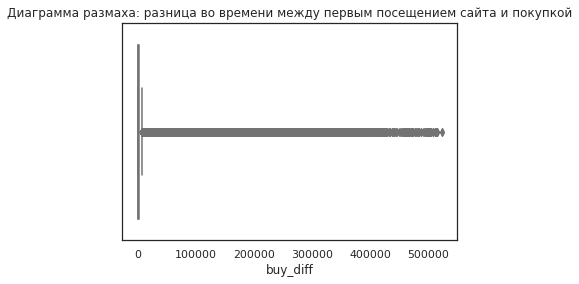

In [78]:
sns.boxplot(x="buy_diff", data=visits_new_2, palette='rainbow')
plt.title('Диаграмма размаха: разница во времени между первым посещением сайта и покупкой')
plt.show()

На диаграмме размаха явно наблюдаются выбросы в значениях, посмотрим поближе, с какого момента начинаются выбросы. Сократим время до 60 минут.

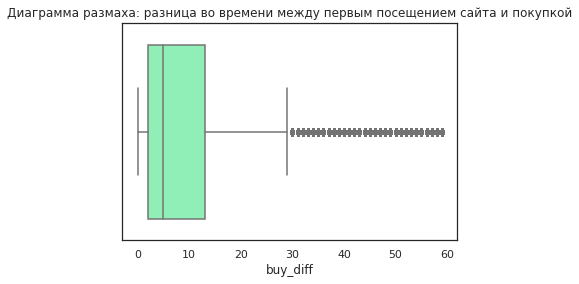

In [79]:
visits_sorted = visits_new_2.query('buy_diff < 60')
sns.boxplot(x="buy_diff", data=visits_sorted, palette='rainbow')
plt.title('Диаграмма размаха: разница во времени между первым посещением сайта и покупкой')
plt.show()

По диаграмме размаха отсортированного столбца buy_diff видно, что свыше 30 минут уже начинаются выбросы. Тогда сосредоточимся на 30 минутах. Построим графики по каждому типу устройства:

In [80]:
#Для начала отсортируем таблицу по типу устройства desktop и столбец buy_diff по значениям меньше 30:
buy_diff_desktop = visits_sorted.query('device == "desktop" and buy_diff < 30')
display(buy_diff_desktop)

,first_visit,device,first_order,buy_diff
uid,,,,
2551852515556206,2017-11-24 10:14:00,desktop,2017-11-24 10:14:00,0.0
3753586865891862,2018-03-03 13:47:00,desktop,2018-03-03 13:50:00,3.0
4808417689019433,2018-01-09 23:10:00,desktop,2018-01-09 23:32:00,22.0
6339315367323360,2018-02-17 14:40:00,desktop,2018-02-17 14:49:00,9.0
6342581087212957,2018-02-17 22:32:00,desktop,2018-02-17 22:37:00,5.0
...,...,...,...,...
18437195840292658200,2017-11-24 14:42:00,desktop,2017-11-24 14:44:00,2.0
18438888612344691875,2017-08-24 23:15:00,desktop,2017-08-24 23:42:00,27.0
18439162270906870763,2017-08-10 21:37:00,desktop,2017-08-10 21:40:00,3.0


count    17102.000000
mean         7.018360
std          6.943835
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         29.000000
Name: buy_diff, dtype: float64

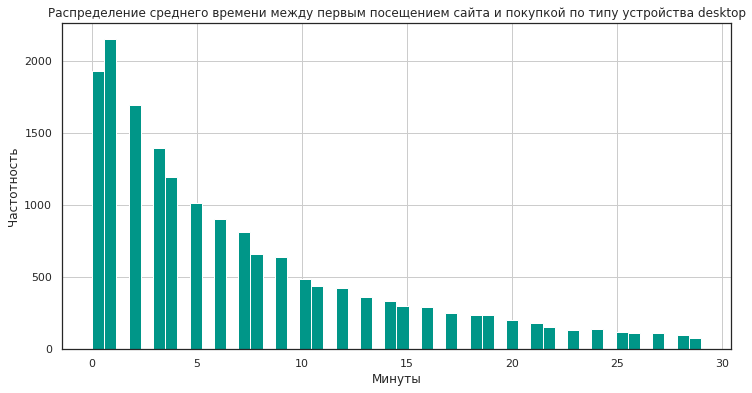

In [81]:
#Построю гистограмму с распределением среднего времени между первым посещением сайта и покупкой по типу устройства desktop:
buy_diff_desktop.hist(bins=50, color="#009688", figsize = (12,6))
plt.title('Распределение среднего времени между первым посещением сайта и покупкой по типу устройства desktop')
plt.ylabel('Частотность')
plt.xlabel('Минуты')
buy_diff_desktop['buy_diff'].describe()

In [82]:
#Отсортируем таблицу по типу устройства touch и столбец buy_diff по значениям меньше 30:
buy_diff_touch = visits_sorted.query('device == "touch" and buy_diff < 30')
display(buy_diff_touch)

,first_visit,device,first_order,buy_diff
uid,,,,
1575281904278712,2017-06-03 10:13:00,touch,2017-06-03 10:13:00,0.0
3077748354309989,2018-03-03 12:08:00,touch,2018-03-03 12:33:00,25.0
4992223027560440,2018-04-04 13:54:00,touch,2018-04-04 13:54:00,0.0
20355530300518189,2017-08-14 14:35:00,touch,2017-08-14 14:52:00,17.0
21801295586117262,2018-01-26 19:14:00,touch,2018-01-26 19:14:00,0.0
...,...,...,...,...
18417867151172617378,2017-12-04 12:19:00,touch,2017-12-04 12:28:00,9.0
18423636499440883616,2018-01-30 14:21:00,touch,2018-01-30 14:29:00,8.0
18428994745177004293,2017-06-26 20:08:00,touch,2017-06-26 20:09:00,1.0


count    3712.000000
mean        6.564655
std         7.002761
min         0.000000
25%         1.000000
50%         4.000000
75%        10.000000
max        29.000000
Name: buy_diff, dtype: float64

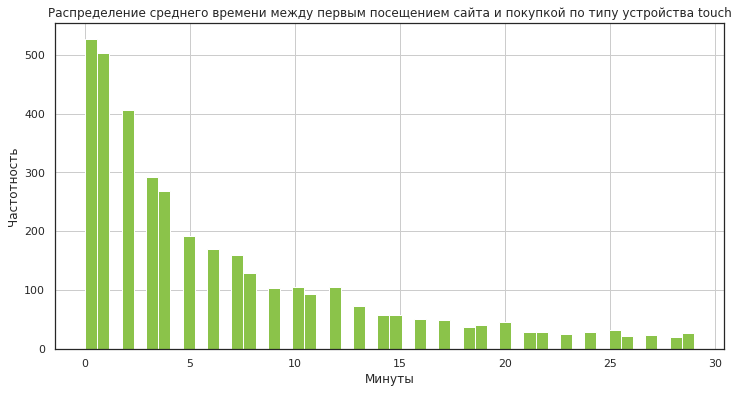

In [83]:
#Построю гистограмму с распределением среднего времени между первым посещением сайта и покупкой по типу устройства touch:
buy_diff_touch.hist(bins=50, color='#8bc34a', figsize = (12,6))
plt.title('Распределение среднего времени между первым посещением сайта и покупкой по типу устройства touch')
plt.ylabel('Частотность')
plt.xlabel('Минуты')
buy_diff_touch['buy_diff'].describe()

После сортировки выбросов среднее время между первым посещением сайта и покупкой 7 минут, медианное время - 5 минут по типу устройства desktop. По типу устройства touch среднее время равно приблизительно 7 минут, а медианное - 4 минуты.
На графиках видно, что большая часть приходится на первые 5 минут, а точнее 0-2 минуты, потом идет спад. На основе чего можно сделать вывод, что пользователи заходят на сайт за чем-то конкретным, сразу совершают покупку и уходят с него.
Но судя по медианному времени, с телефона покупка совершается немного быстрее, чем с ПК, скорее всего, на пользователям удобнее и интереснее изучать информацию на сайте с ПК.

<a name="21"></a>
#### 3.2. Выводы, сделанные после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции

Выводы, сделанные после подсчёта продуктовых метрик:

1. Средний MAU равен 23228.   

В ноябре MAU достигает своего максимального показателя в 32797 пользователей, что на 29% выше среднего, рост по сравнению с октябрём - 10.5%, в следующие месяца наблюдается небольшой спад, а к маю падает до 20701 пользователей. В целом, здесь можно наблюдать сезонное изменение MAU - просмотр фильмов актуален, в большинстве своём, в холодное время года.

2. Средний WAU равен 5716.  

По графику изменения WAU заметила, что в ноябре именно на 47 неделе 2017 года произошёл скачок активной аудитории - на 30.5% по сравнению с предыдущей неделей, показатель достиг своего максимума за всё время - 10586 пользователей, что почти в 2 раза выше среднего WAU равного 5716 пользователей. Что может быть связано с выходом на этой неделе определенного фильма, которого многие ждали, либо прохождением какого-то мероприятия, куда пользователи хотели попасть. Также на данном графике хорошо видно увеличение WAU до 7898 пользователей на 12 неделе 2018 года, рост по сравнению с предыдущей неделей на 26.9%, вероятнее всего это опять связано с выходом долгожданной киноновинки. Самый низкий показатель зафиксирован на 22 неделе 2017 года, равный 2021 пользователь. На данном графике также хорошо прослеживается сезонность - летом WAU ниже, чем зимой.

3. Средний DAU равен 907.  

По графику DAU мы также видим резкий скачок активной аудитории во второй половине ноября - показатель достигает отметки выше 3000 пользователей, это в 3 раза выше среднего значения DAU равного 907. А в конце марта, наоборот, этот показатель неожиданно упал до 0, возможно, это было связано с неполадками на сайте. К тому же на данном графике можно увидеть резкий рост DAU в начале июня - примерно до 2000 пользователей, видимо, это длилось 1-2 дня, поэтому данный факт было не видно по графикам MAU и DAU.

4. Средний показатель количества сессий на одного пользователя в день равен 1.   

Во второй половине ноября данный показатель достиг максимального значения, также как и DAU, - 1.22 сессий на уникального пользователя, что на 13% выше среднего значения равного 1.08, а в конце марта минимального - 0, возможно по причине возникших проблем сайтом, как мы предположили выше. Также наблюдается скачок в феврале примерно до 1.14 сессий на уникального пользователя. Сильные спады данного показателя наблюдаются в июне и в августе, - в хорошую погоду просмотр фильмов неактуален.

5. После фильтрации выбросов, получили, что среднее время сессии 486 секунд, а медианное так и осталось 300 секунд, что ближе всего к истине. По построенной гистограмме можно сделать вывод, что самая частая длительность сессии - менее 100 секунд.  

6. На шестой месяц жизни когорты самый высокий показатель Retention Rate у когорты пользователей, пришедших в июне - 6.1%, а самый низкий у когорты октября, - 2.14%. При том, явно наблюдается такая тенденция, что каждая последующая когорта имеет показатель удержания ниже, чем у предыдущей когорты. Например, у когорты пользователей, пришедших в июле коэффициент удержания ниже на 25.6%, чем у пользователей, пришедших в июне. Это говорит, что с каждой новой когортой поведение пользователей меняется. Возможно, были выбраны неэффективные источники трафика.  

Выводы, сделанные после подсчёта метрик электронной коммерции:
1. После сортировки выбросов среднее время между первым посещением сайта и покупкой стало равно 7 минутам, медианное время - 5 минут. На графике видно, что большая часть приходится на первые 5 минут, а точнее 0-2 минуты, потом уже идет спад. На основе чего можно сделать вывод, что пользователи заходят на сайт за чем-то конкретным, сразу совершают покупку и уходят с него.

2. Самое большое число покупок на одного пользователя у когорты июня 2017 года, при том, эта когорта опережает другие по данному показателю в каждый "месяц своей жизни". На третьем "месяце жизни" июньской когорты количество покупок на пользователя - 4.2, а на шестом "месяце жизни" оно достигает максимума - 4.5, в то время как у июльской на этом же "месяце жизни" всего 1.7 - на 62% меньше. На одиннадцатом месяце число покупок июньской когорты падает до 1.6. Хорошо себя показывают майская и июньская когорты 2018 года, с 2 и 2.8 покупок на пользователя на первом месяце существования. У майской когорты в среднем 3 покупки на пользователя на втором "месяце жизни" - это хорошая тенденция, по данному показателю они догоняют когорту июня 2017 года.

3. Размер выручки с одного уникального пользователя равен 6.9 у.е.

По линейному графику, отображающем изменение во времени средней выручки с пользователя, видим, что максимума этот показатель достиг в декабре - примерно 7.4 у.е. на уникального пользователя, на втором месте по этому показателю март - 6.8 у.е., - на 8.1% ниже, чем в декабре. Минимум пришел на июнь - 3.4 у.е., что на 58% ниже, чем в декабре. 

4. На примере когорт, существующих не менее 6 месяцев, наблюдаем самый высокий накопительный показатель LTV у сентябрьской когорты, эта когорта каждый месяц приносит прибыль, - от 4.7 у.е. на человека в месяц первого посещения LTV вырос до 9.3 у.е. к 6 месяцу - рост 97.9%. А пользователь из сентябрьской когорты в среднем принес 13 у.е на шестом месяце её существования, - рост 132% по сравнению с показателем месяца первого посещения (5.6). Самый низкий LTV у когорты октября - 6.2 у.е. на пользователя, рост всего на 24% за 6 месяцев.

Выводы, сделанные после подсчёта маркетинговых метрик:

1. Общая сумма расходов на маркетинг равна 329131.62 у.е. 

По таблице распределения трат на маркетинг по источникам трафика видим, что самый дорогой источник трафика 3, - доля равна 42.9% от всех затрат на маркетинг. Интересно, что источник 3 и так самый дорогой, но начиная с августа затраты на него стали сильно расти, видимо, маркетологи сделали ставку на него. Далее идет источник 4 - 18.6% от всех затрат, в декабре затраты на него подросли, но к январю начали снова падать. А на третьем месте источник 5 с долей расходов равной 15.7%. Источники 9 и 10 на протяжении всего периода имеют маленькие доли - с среднем 1.7% и 1.8% соответственно, поэтому на графике они слились.

2. Средняя стоимость привлечения одного покупателя равна приблизительно 7.96 у.е. 

Дороже всего обходится привлечение покупателя из источника 3 - 13.49 у.е., чуть дешевле из источника 2 - 12.2 у.е., привлечение покупателя из источника 5 в среднем обходится в 7.47 у.е. Самый дешевый источник трафика 10 - стоимость привлечения клиента 4.38 у.е., это в 3 раза дешевле, чем у источника 3.


3. Рассчитав ROMI в разрезе источников трафика я пришла к выводу, что окупился и принёс прибыль только источник трафика 1 - его ROMI равен 1.49. Источники 2, 9 и 5 только окупились - их ROMI близок к 1, - это означает, что доходов данные источники не принесли. Ниже всего ROMI у источника 3, равен 0.38, что почти в 4 раза ниже, чем ROMI источника 1.

<a name="22"></a>
#### 3.3. Подведение итогов когортного анализа. Определение самых перспективных для компании когорт клиентов

Рассмотрев когорты с "длиной жизни" не менее 6 месяцев, я пришла к выводу, что самой перспективной является когорта июня 2017 года.
Во-первых, у неё самый стойкий Retention. Все пользователи, кто пришли позже, не так часто возвращаются по сравнению с пользователями июньской когорты. Чтобы понять, что заставляет возвращаться людей, стоит сосредоточить исследование на первой когорте. Во-вторых, каждый месяц самое большое число покупок на одного пользователя тоже у когорты июня 2017 года, при том, эта когорта опережает другие по данному показателю в каждый "месяц своей жизни". На шестом "месяце жизни" число покупок достигает максимума - 4.5 на пользователя.

<a name="23"></a>
#### 3.4. Как различаются метрики в разрезе устройств

Чаще всего пользователи заходят на сайт с ПК, чем с телефона, доли по типам устройств распределены как 73% и 27% соответственно, - об этом нужно передать разработке, возможно, нужно что-то доработать в мобильной версии сайта, чтобы стало удобнее пользоваться сервисом с телефона.
Средняя выручка с пользователя, зашедшего с ПК равна 7.24 у.е., а с пользователя, зашедшего с телефона или планшета, средняя выручка равна 5.55 у.е., что меньше на 23.3%. Возможно, что в мобильной версии сайта неудобно совершать покупки, тогда над ней стоит поработать, - маркетологам опять же следует об этом поговорить с разработчиками.
Среднее время между первым посещением сайта и покупкой 7 минут, медианное время - 5 минут по типу устройства desktop. По типу устройства touch среднее время равно приблизительно 7 минут, а медианное - 4 минуты. Судя по медианному времени, с телефона покупка совершается немного быстрее, чем с ПК, скорее всего, пользователям удобнее и интереснее изучать информацию на сайте с ПК, чем с телефона или планшета.